# Using Parsed Data for Phrase Modelling

Executing bigram and trigram phrase modelling from the parsed sentences using konlpy

In [30]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim.models import word2vec

In [3]:
sentences_normalized_filepath = "bamboo_parsed.txt"

bigram_model_path = 'bigram_model'
trigram_model_path = 'trigram_model'

bigram_filepath = 'bamboo_bigram.txt'
trigram_filepath = 'bamboo_trigram.txt'

unigram_sentences = LineSentence(sentences_normalized_filepath)

bigram_model = Phrases(unigram_sentences)
bigram_model.save(bigram_model_path)

bigram_made = True

if not bigram_made:
    with open(bigram_filepath, 'w') as f:
            for unigram_sentence in unigram_sentences:
                bigram_sentence = bigram_model[unigram_sentence]
                f.write(' '.join(bigram_sentence) + '\n')
            
bigram_sentences = LineSentence(bigram_filepath)
trigram_model = Phrases(bigram_sentences)
trigram_model.save(trigram_model_path)

Call the necessary parsed file to be modified 

In [4]:
from konlpy.tag import Okt
import csv

twitter = Okt()

results = []

data_path = 'posts_data_50.csv'

In [15]:
def clean_posts(post):
    lines = post[0].split("\n")
    for line in lines:
        temp_list = twitter.pos(line, norm=True, stem=True)
        r = []
        for word in temp_list:
            if not word[1] in ["Josa", "Eomi", "Punctuation"]:
                r.append(word[0])
        rl = (" ".join(r)).strip()
    return rl

In [ ]:
"""with open(data_path) as f:
    data = csv.reader(f, delimiter=',')
    for row in data:
        clean_posts(row)
        
del result[0]"""

In [16]:
with open(data_path) as f:
    data = csv.reader(f, delimiter=',')
    for row in data:
        results.append(clean_posts(row))
        

In [22]:
def build_corpus(data):
    corpus = []
    for item in data:
        word_list = item.split(" ")
        corpus.append(word_list)
    return corpus

In [25]:
corpus_made = False

if not corpus_made:
    corpus = build_corpus(results)

# Word2Vec in visualization purposes

In [31]:
model = word2vec.Word2Vec(corpus, size=100, window=20,min_count=200, workers = 4)

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [40]:
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

['NanumSquare', 'NanumSquare', 'NanumSquare', 'NanumSquare']

In [41]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


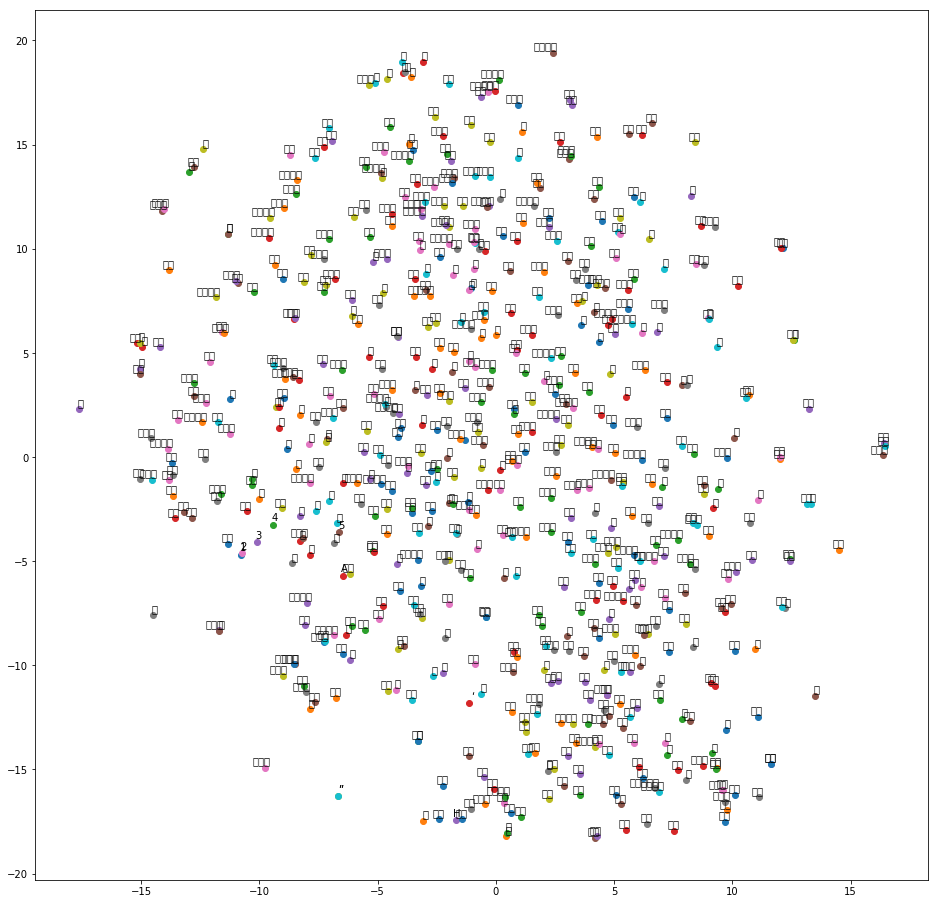

In [37]:
tsne_plot(model)